# Processing model results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline
plt.rcParams.update({'font.size': 24})

# import seaborn as sns
# sns.set()

### GMFD

In [18]:
# Load GMFD data
gmfd = pd.read_csv("../GMFD_calc/output/gmfd_yield_historical.csv")
gmfd["GEOID"] = gmfd["GEOID"].astype(str).str.zfill(5)
gmfd.set_index(["GEOID", "Year"], inplace = True)

In [19]:
# Read in USDA data
usda = pd.read_csv("../USDA/final/USDA_county_yields_w_quad_state_trends.csv")
usda["state_fips_code"] = usda["state_fips_code"].astype(str).str.zfill(2)
usda["county_code"] = usda["county_code"].astype(str).str.zfill(3)
usda["GEOID"] = usda["state_fips_code"] + usda["county_code"]
usda["GEOID"] = usda["GEOID"].astype(str).str.zfill(5)
usda.set_index(["GEOID", "year"], inplace = True)

In [20]:
usda.head()

,,state_fips_code,county_code,asd_code,Value,area,Log_value,state_Value,lowess_log_state_Value,quad_fit,target_Value,log_state_Value
GEOID,year,,,,,,,,,,,
01001,1950,01,001,40,17.0,29600.0,2.833213,21.5,3.033747,2.930451,-0.097238,3.068053
01011,1950,01,011,40,11.0,24200.0,2.397895,21.5,3.033747,2.930451,-0.532556,3.068053
01047,1950,01,047,40,13.0,44200.0,2.564949,21.5,3.033747,2.930451,-0.365502,3.068053
01051,1950,01,051,40,23.0,38900.0,3.135494,21.5,3.033747,2.930451,0.205043,3.068053
01063,1950,01,063,40,16.0,23900.0,2.772589,21.5,3.033747,2.930451,-0.157862,3.068053


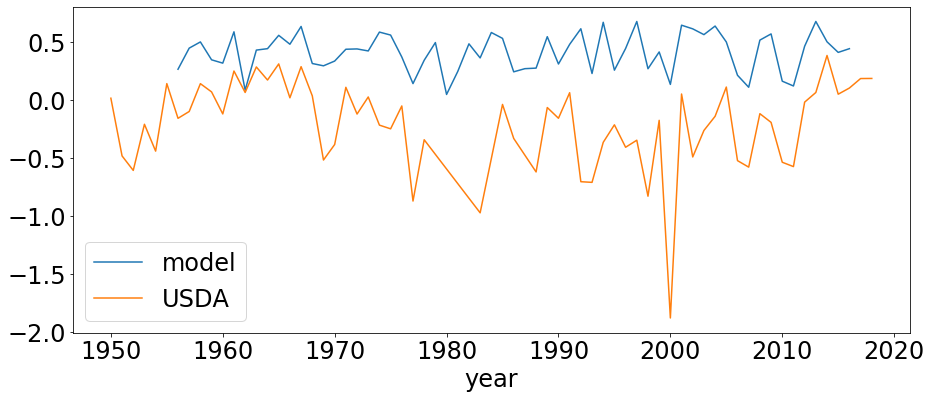

In [21]:
# Testing
fig, ax = plt.subplots(figsize = (15,6))
gmfd.query("GEOID == '01007'").reset_index().plot(x = "Year", y = "projected", ax = ax, label = "model")
usda.query("GEOID == '01007'").reset_index().plot(x = "year", y = "target_Value", ax = ax, label = "USDA")
plt.legend()
plt.show()

In [22]:
# Offset by means (equivalent to minimising sum of square of residuals)
gmfd["projected_offset"] = 0.0

for geoid in usda.index.unique(level = "GEOID"):
    if geoid in gmfd.index:
        model_mean = gmfd.loc[geoid]["projected"].mean()
        data_mean = usda.loc[geoid].query("year >= 1956 and year <= 2016")["target_Value"].mean()
    
        gmfd.loc[geoid]["projected_offset"] = gmfd.loc[geoid]["projected"] - model_mean + data_mean

In [23]:
gmfd.head()

projected  projected_offset
GEOID Year                             
01001 1956   0.261070         -0.344891
      1957   0.401992         -0.203968
      1958   0.461658         -0.144302
      1959   0.273305         -0.332655
      1960   0.320877         -0.285084

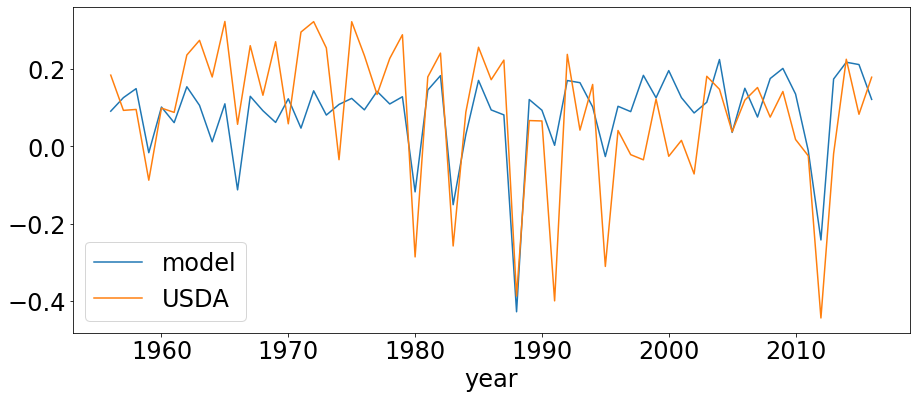

In [24]:
# Testing
fig, ax = plt.subplots(figsize = (15,6))
gmfd.query("GEOID == '17019'").reset_index().plot(x = "Year", y = "projected_offset", ax = ax, label = "model")
usda.query("GEOID == '17019' and year >= 1956 and year <= 2016").reset_index().plot(x = "year", y = "target_Value", ax = ax, label = "USDA")
plt.legend()
plt.show()

In [25]:
# Save
gmfd.to_csv("./final/GMFD/yield_historical_gmfd_quad_state_offset.csv")

# NEX

In [10]:
# Read in USDA data for "target value"
usda = pd.read_csv("../USDA/final/USDA_county_yields_w_quad_state_trends.csv")
usda["state_fips_code"] = usda["state_fips_code"].astype(str).str.zfill(2)
usda["county_code"] = usda["county_code"].astype(str).str.zfill(3)
usda["GEOID"] = usda["state_fips_code"] + usda["county_code"]
usda["GEOID"] = usda["GEOID"].astype(str).str.zfill(5)
usda.set_index(["GEOID","year"], inplace = True)

In [9]:
nex_hind = ["yield_historical_r1i1p1_ACCESS1-0.csv",
"yield_historical_r1i1p1_BNU-ESM.csv",
"yield_historical_r1i1p1_CCSM4.csv",
"yield_historical_r1i1p1_CESM1-BGC.csv",
"yield_historical_r1i1p1_CNRM-CM5.csv",
"yield_historical_r1i1p1_CSIRO-Mk3-6-0.csv",
"yield_historical_r1i1p1_CanESM2.csv",
"yield_historical_r1i1p1_GFDL-CM3.csv",
"yield_historical_r1i1p1_GFDL-ESM2G.csv",
"yield_historical_r1i1p1_GFDL-ESM2M.csv",
"yield_historical_r1i1p1_IPSL-CM5A-LR.csv",
"yield_historical_r1i1p1_IPSL-CM5A-MR.csv",
"yield_historical_r1i1p1_MIROC-ESM-CHEM.csv",
"yield_historical_r1i1p1_MIROC-ESM.csv",
"yield_historical_r1i1p1_MIROC5.csv",
"yield_historical_r1i1p1_MPI-ESM-LR.csv",
"yield_historical_r1i1p1_MPI-ESM-MR.csv",
"yield_historical_r1i1p1_MRI-CGCM3.csv",
"yield_historical_r1i1p1_NorESM1-M.csv",
"yield_historical_r1i1p1_bcc-csm1-1.csv",
"yield_historical_r1i1p1_inmcm4.csv"]

nex_proj = ["yield_rcp85_r1i1p1_ACCESS1-0.csv",
"yield_rcp85_r1i1p1_BNU-ESM.csv",
"yield_rcp85_r1i1p1_CCSM4.csv",
"yield_rcp85_r1i1p1_CESM1-BGC.csv",
"yield_rcp85_r1i1p1_CNRM-CM5.csv",
"yield_rcp85_r1i1p1_CSIRO-Mk3-6-0.csv",
"yield_rcp85_r1i1p1_CanESM2.csv",
"yield_rcp85_r1i1p1_GFDL-CM3.csv",
"yield_rcp85_r1i1p1_GFDL-ESM2G.csv",
"yield_rcp85_r1i1p1_GFDL-ESM2M.csv",
"yield_rcp85_r1i1p1_IPSL-CM5A-LR.csv",
"yield_rcp85_r1i1p1_IPSL-CM5A-MR.csv",
"yield_rcp85_r1i1p1_MIROC-ESM-CHEM.csv",
"yield_rcp85_r1i1p1_MIROC-ESM.csv",
"yield_rcp85_r1i1p1_MIROC5.csv",
"yield_rcp85_r1i1p1_MPI-ESM-LR.csv",
"yield_rcp85_r1i1p1_MPI-ESM-MR.csv",
"yield_rcp85_r1i1p1_MRI-CGCM3.csv",
"yield_rcp85_r1i1p1_NorESM1-M.csv",
"yield_rcp85_r1i1p1_bcc-csm1-1.csv",
"yield_rcp85_r1i1p1_inmcm4.csv"]

In [11]:
# Function to subtract means
def run_offset(name):
    # Read in data
    data = pd.read_csv("./raw/NEX/" + name)
    
    # Set columns to contain offsetted results
    data["projected_offset"] = 0.0
    
    # Re-index data and merge with "reported" to delete zero yields later
    data["GEOID"] = data["GEOID"].astype(str).str.zfill(5)
    data.set_index(["GEOID","Year"], inplace = True)

    for geoid in usda.index.unique(level = "GEOID"):
        if geoid in data.index:
            model_mean = data.loc[geoid].query("Year >= 1950 and Year <= 2005")["projected"].mean()
            data_mean = usda.loc[geoid].query("year >= 1950 and year <= 2005")["target_Value"].mean()
    
            data.loc[geoid]["projected_offset"] = data.loc[geoid]["projected"] - model_mean + data_mean
    
    # Save
    data.to_csv("./final/NEX/res_quad_state_" + name)

In [16]:
# Run all
for nex in nex_hind[15:]:
    run_offset(nex)

In [17]:
# Store USDA means
data_means = {}
for geoid in usda.index.unique(level = "GEOID"):
    data_mean = usda.loc[geoid].query("year >= 1950 and year <= 2005")["target_Value"].mean()
    data_means.update({geoid : data_mean})

In [18]:
# Function to subtract means
def run_offset(name):
    old = name.replace("rcp85", "historical")
    # Read in data
    data = pd.read_csv("./raw/NEX/" + name)
    old = pd.read_csv("./raw/NEX/" + old)
    old.head()
    
    # Set columns to contain offsetted results
    data["projected_offset"] = 0.0
    
    # Re-index data and merge with "reported" to delete zero yields later
    data["GEOID"] = data["GEOID"].astype(str).str.zfill(5)
    old["GEOID"] = old["GEOID"].astype(str).str.zfill(5)
    data.set_index(["GEOID","Year"], inplace = True)
    old.set_index(["GEOID","Year"], inplace = True)

    for geoid in usda.index.unique(level = "GEOID"):
        if geoid in data.index:
            model_mean = old.loc[geoid].query("Year >= 1950 and Year <= 2005")["projected"].mean()
            data_mean = data_means[geoid]
            data.loc[geoid]["projected_offset"] = data.loc[geoid]["projected"] - model_mean + data_mean
    
    # Save
    data.to_csv("./final/NEX/res_quad_state_" + name)

In [19]:
# Run all
for nex in nex_proj:
    run_offset(nex)

# CMIP

In [2]:
# Read in USDA data for "target value"
usda = pd.read_csv("../USDA/final/USDA_county_yields_w_quad_state_trends.csv")
usda["state_fips_code"] = usda["state_fips_code"].astype(str).str.zfill(2)
usda["county_code"] = usda["county_code"].astype(str).str.zfill(3)
usda["GEOID"] = usda["state_fips_code"] + usda["county_code"]
usda["GEOID"] = usda["GEOID"].astype(str).str.zfill(5)
usda.set_index(["GEOID","year"], inplace = True)

In [3]:
usda.head()

,,state_fips_code,county_code,asd_code,Value,area,Log_value,state_Value,lowess_log_state_Value,quad_fit,target_Value,log_state_Value
GEOID,year,,,,,,,,,,,
01001,1950,01,001,40,17.0,29600.0,2.833213,21.5,3.033747,2.930451,-0.097238,3.068053
01011,1950,01,011,40,11.0,24200.0,2.397895,21.5,3.033747,2.930451,-0.532556,3.068053
01047,1950,01,047,40,13.0,44200.0,2.564949,21.5,3.033747,2.930451,-0.365502,3.068053
01051,1950,01,051,40,23.0,38900.0,3.135494,21.5,3.033747,2.930451,0.205043,3.068053
01063,1950,01,063,40,16.0,23900.0,2.772589,21.5,3.033747,2.930451,-0.157862,3.068053


In [4]:
cmip_all = ["yield_ACCESS1-0.historical+rcp85.csv",
"yield_BNU-ESM.historical+rcp85.csv",
"yield_CCSM4_historical+rcp85.csv",
"yield_CESM1-BGC.historical+rcp85.csv",
"yield_CNRM-CM5.historical+rcp85.csv",
"yield_CSIRO-Mk3-6-0.historical+rcp85.csv",
"yield_CanESM2.historical+rcp85.csv",
"yield_GFDL-CM3.historical+rcp85.csv",
"yield_GFDL-ESM2G.historical+rcp85.csv",
"yield_GFDL-ESM2M.historical+rcp85.csv",
"yield_IPSL-CM5A-LR.historical+rcp85.csv",
"yield_IPSL-CM5A-MR.historical+rcp85.csv",
"yield_MIROC-ESM-CHEM.historical+rcp85.csv",
"yield_MIROC-ESM.historical+rcp85.csv",
"yield_MIROC5.historical+rcp85.csv",
"yield_MPI-ESM-LR.historical+rcp85.csv",
"yield_MPI-ESM-MR.historical+rcp85.csv",
"yield_MRI-CGCM3.historical+rcp85.csv",
"yield_NorESM1-M.historical+rcp85.csv",
"yield_bcc-csm1-1_historical+rcp85.csv",
"yield_inmcm4.historical+rcp85.csv"]

In [7]:
# Function to subtract means
def run_offset(name):
    # Read in data
    data = pd.read_csv("./raw/CMIP/" + name)
    
    # Set columns to contain offsetted results
    data["projected_offset"] = 0.0
    
    # Re-index data and merge with "reported" to delete zero yields later
    data["GEOID"] = data["GEOID"].astype(str).str.zfill(5)
    data.set_index(["GEOID","Year"], inplace = True)

    for geoid in usda.index.unique(level = "GEOID"):
        if geoid in data.index:
            model_mean = data.loc[geoid].query("Year >= 1950 and Year <= 2005")["projected"].mean()
            data_mean = usda.loc[geoid].query("year >= 1950 and year <= 2005")["target_Value"].mean()
    
            data.loc[geoid]["projected_offset"] = data.loc[geoid]["projected"] - model_mean + data_mean
    
    # Save
    data.to_csv("./final/CMIP/res_quad_state_" + name)

In [8]:
# Run all
for cmip in cmip_all:
    run_offset(cmip)